In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
path = "Results/energy/energy_ip_100_op_50_robust_2/energy/"
preds = np.load(path+'trans-mse-ar_pred_mu.npy')
inputs = np.load(path+'inputs.npy')
trues = np.load(path+'targets.npy')
#preds = preds.reshape(-1, preds.shape[-2], preds.shape[-1])
#trues = trues.reshape(-1, preds.shape[-2], preds.shape[-1])
# [samples, pred_len, dimensions]
print(preds.shape, trues.shape, inputs.shape)

print("mse : ",mean_squared_error(trues.squeeze(),preds.squeeze()),"mae: ",mean_absolute_error(trues.squeeze(),preds.squeeze()))

(41, 50, 1) (41, 50, 1) (41, 100, 1)
mse :  10821.499 mae:  68.53496


In [2]:
# x = preds.reshape(54,13,-1,1)
# preds = x.mean(axis=1)
# preds.shape
# x = trues.reshape(54,13,-1,1)
# trues = x.mean(axis=1)
# trues.shape

# print("mse : ",mean_squared_error(trues.squeeze(),preds.squeeze()),"mae: ",mean_absolute_error(trues.squeeze(),preds.squeeze()))

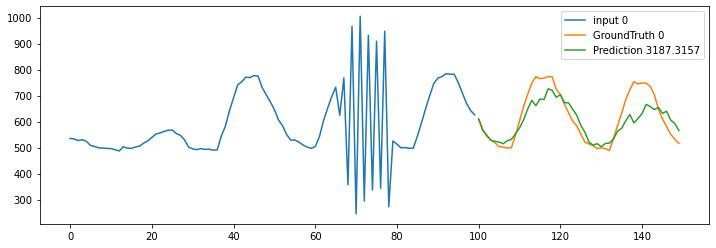

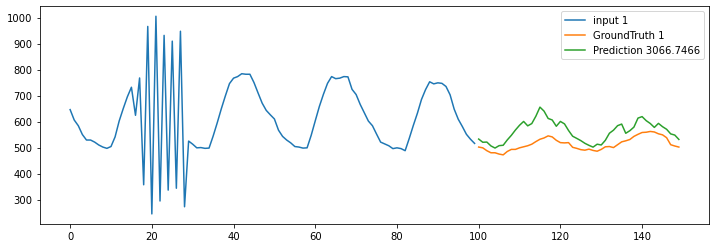

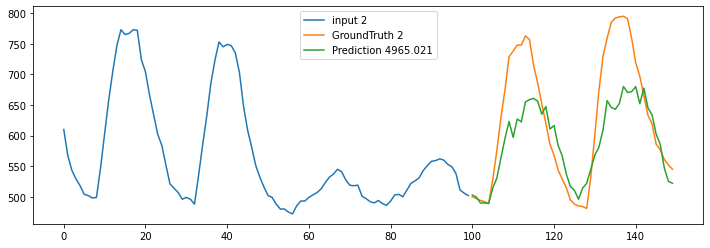

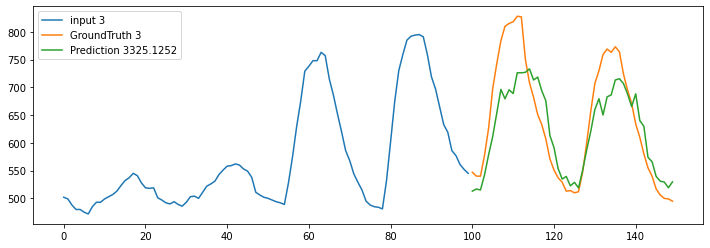

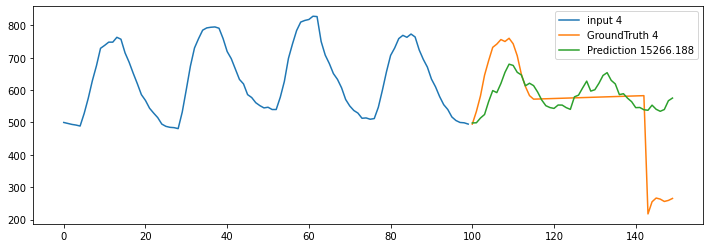

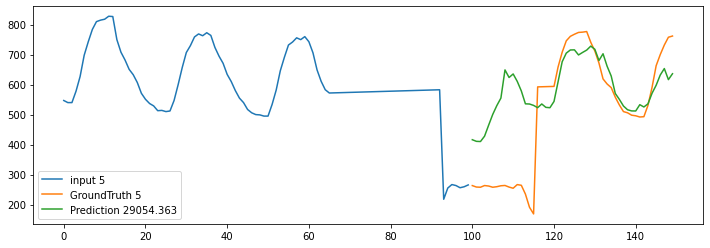

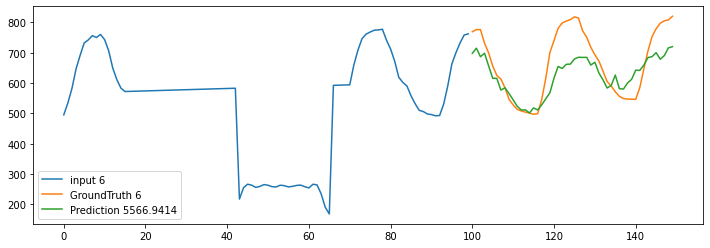

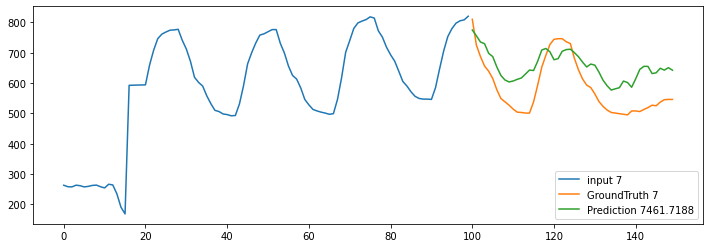

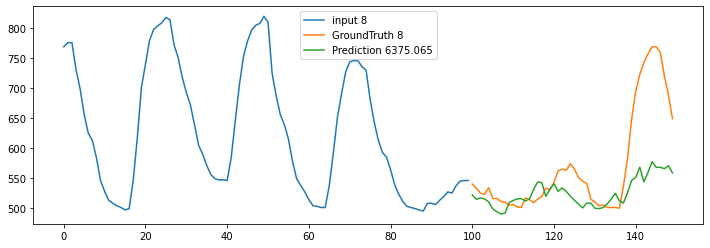

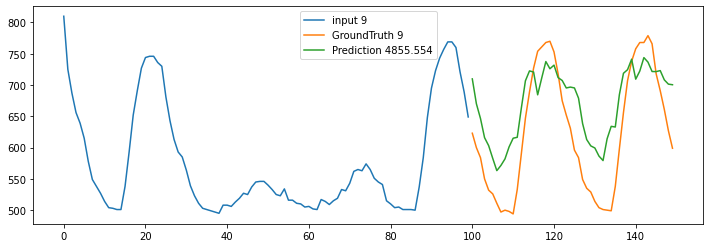

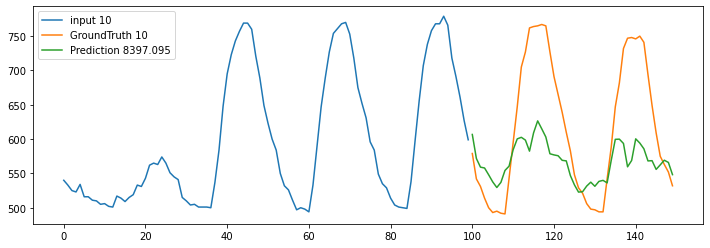

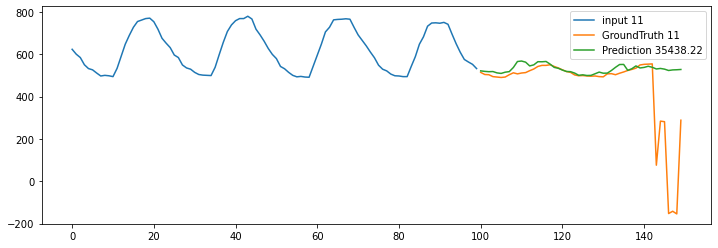

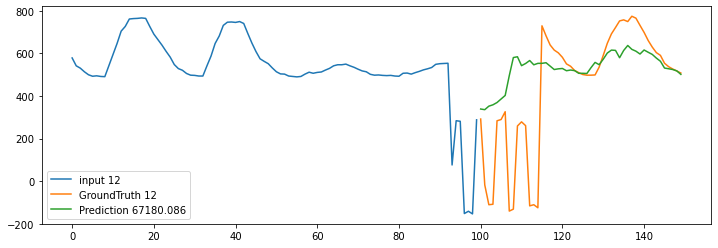

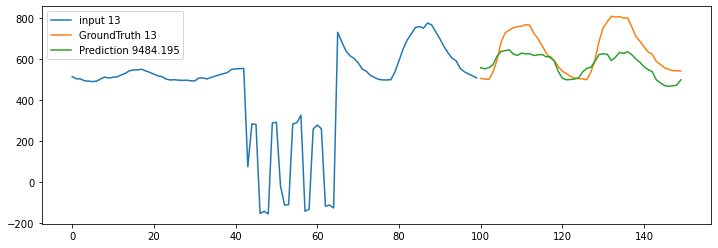

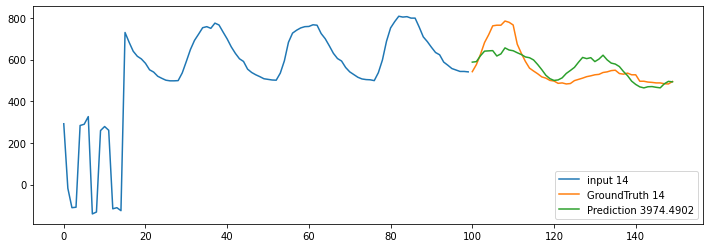

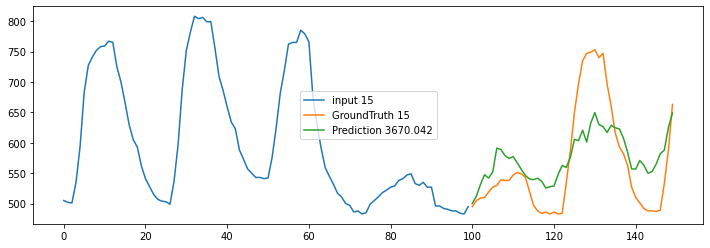

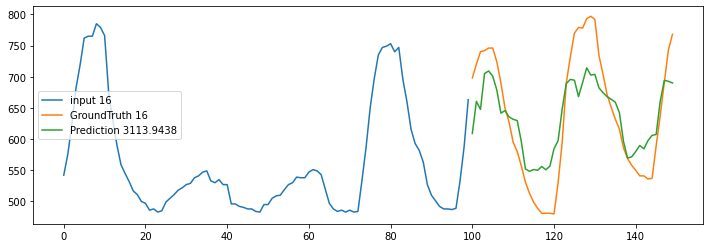

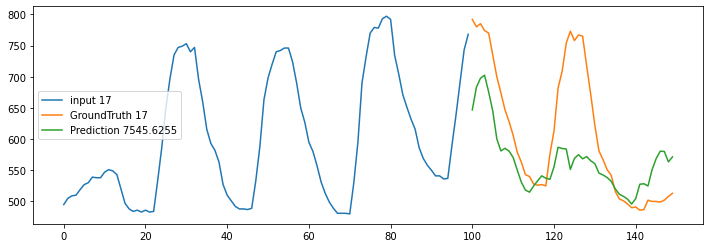

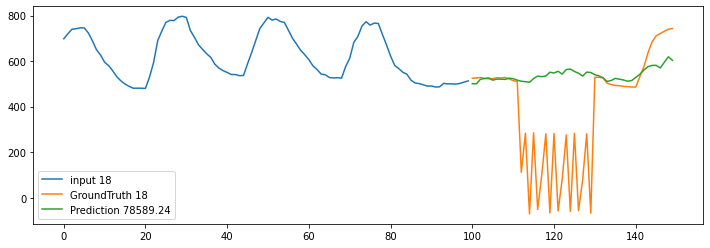

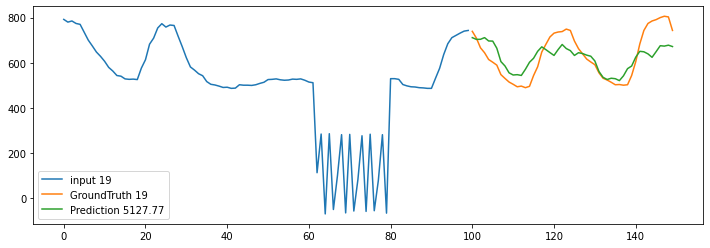

In [2]:
plt.rcParams['figure.figsize'] = (12,4)
x = np.arange(inputs.shape[1]+preds.shape[1])
a = inputs.shape[1]

for i in range(20):
    plt.figure()
    c =i 
    plt.plot(x[:a],inputs[c],label='input '+str(c))
    plt.plot(x[a:],trues[c,:,0], label='GroundTruth '+str(c))
    #for i in range(1):

    plt.plot(x[a:],preds[c,:,0], label='Prediction '+str(mean_squared_error(preds[c,:,0],trues[c,:,0])))
    
    plt.legend()
    # fig = plt.figure()
    # plt.savefig("images/trans-mse_test_"+str(i)+".png")
    
    # plt.show()

In [7]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from sklearn.metrics import mean_squared_error,mean_absolute_error
path = "Results/energy/energy_ip_100_op_50_robust_2/energy/"
preds = np.load(path+'trans-mse-ar_pred_mu.npy')
inputs = np.load(path+'inputs.npy')
trues = np.load(path+'targets.npy')
new_preds = preds.squeeze()
new_trues = trues.squeeze()
N_input = 336
print(new_preds.shape,new_trues.shape)
n = (N_input-1)//50 + 1
l = new_preds.shape[0]
final = []
for line in range(0,l,n-1):
    chunk = dict()
    chunk['preds'] = new_preds[line:line+n]
    chunk['trues'] = new_trues[line:line+n]
    chunk['mask'] = np.zeros_like(new_trues[line:line+n])
    chunk['mse'] = [mean_squared_error(i,j) for i,j in zip(new_preds[line:line+n],new_trues[line:line+n])]
    final.append(chunk)
mse = [mean_squared_error(i,j) for i,j in zip(new_preds,new_trues)]
for j,line in enumerate(final):
    # print(sorted(line['mse'],reverse=True))
    if True in list((np.quantile(mse,0.75)+iqr(mse,interpolation='midpoint')*1.5)<line['mse']):
        print(np.argsort(line['mse'])[-1],max(line['mse']))
        i = np.argsort(line['mse'])[-1]
        final[j]['mask'][i]=1
mask = final[0]['mask'].flatten()
for line in final[1:]:
    mask=np.hstack((mask,line['mask'][1:].flatten()))
np.save("/mnt/a99/d0/sandy/Forecasting/data/energy-anomaly-detection/mask_energy.npy",mask)

(41, 50) (41, 50)
5 29054.363
6 67180.086
6 78589.24
0 78589.24


In [6]:
(np.quantile(mse,0.75)+iqr(mse,interpolation='midpoint')*1.5)

21999.887817382812